In [1]:
cd /home/dongdong/SCR/msm_pdz/complex/12concentration/Q_heavyatoms

/scratch/gpfs/dongdong/msm_pdz/complex/12concentration/Q_heavyatoms


In [2]:
def Qrange(x):
    return int(x*100.0)/100.0

In [3]:
import numpy as np
QrangeCount={}
for i in np.arange(0.0,1.0,0.01):
    QrangeCount[str(i)]=[]
for trj in range(1,64):
    #print trj
    for chain in range(1,13):
        Qheavy=np.loadtxt('fit'+str(trj)+'_chain'+str(chain)+'_Q_heavyatoms.cs')
        macro_traj=np.loadtxt('/home/dongdong/SCR/msm_pdz/complex/12concentration/toHubMfpt25states/fit'+str(trj)+'_skip10_chain'+str(chain)+'_macro_trajs.dat')
        if trj in [20,30,32,36]:
            lenQh=10001
        elif trj in [19]:
            lenQh=14001
        else:
            lenQh=len(Qheavy)
        for num in range(lenQh):
            #print Qrange(Qheavy[num])
            QrangeCount[str(Qrange(Qheavy[num]))].append(macro_traj[num])
            #if Qrange(Qheavy[num])==0.600:
                #print str(trj)+'  '+str(chain)

In [16]:

wf=open('Q005_macrostates.cs','w')
for i in range(25):
    popu=QrangeCount['0.05'].count(i)/(len(QrangeCount['0.05'])+0.0)
    #print popu
    wf.write(str(i)+'   '+str(popu)+'\n')
wf.close()

In [5]:
newCount=[]
for i in np.arange(0.21,0.31,0.01):
    newCount.extend(QrangeCount[str(i)])

In [6]:
wf=open('Q021-031_macrostates.cs','w')
for i in range(25):
    popu=newCount.count(i)/(len(newCount)+0.0)
    #print popu
    wf.write(str(i)+'   '+str(popu)+'\n')
wf.close()

In [10]:
allQ0=[]
for trj in range(1,64):
    #print trj
    for chain in range(1,13):
        Qheavy=np.loadtxt('fit'+str(trj)+'_chain'+str(chain)+'_Q_heavyatoms.cs')
        macro_traj=np.loadtxt('/home/dongdong/SCR/msm_pdz/complex/12concentration/toHubMfpt25states/fit'+str(trj)+'_skip10_chain'+str(chain)+'_macro_trajs.dat')
        if trj in [20,30,32,36]:
            lenQh=10001
        elif trj in [19]:
            lenQh=14001
        else:
            lenQh=len(Qheavy)
        for qq in range(len(Qheavy)):
            if Qheavy[qq]<0.00001:
                allQ0.append(macro_traj[qq])

In [27]:
QrangeCount_succeed={}
for i in np.arange(0.0,1.0,0.01):
    QrangeCount_succeed[str(i)]=[]
binding_succeed_infor=np.loadtxt('binding_succeed_information.cs')
for i in range(len(binding_succeed_infor)):
    trj=int(binding_succeed_infor[i][0])
    chain=int(binding_succeed_infor[i][1])
    suceed=int(binding_succeed_infor[i][2])
    if suceed==1:
        Qheavy=np.loadtxt('fit'+str(trj)+'_chain'+str(chain)+'_Q_heavyatoms.cs')
        macro_traj=np.loadtxt('/home/dongdong/SCR/msm_pdz/complex/12concentration/toHubMfpt25states/fit'+str(trj)+'_skip10_chain'+str(chain)+'_macro_trajs.dat')
        for num in range(len(Qheavy)):
            #print Qrange(Qheavy[num])
            QrangeCount_succeed[str(Qrange(Qheavy[num]))].append(macro_traj[num])

In [4]:
newCount=[]
for i in np.arange(0.01,0.9,0.01):
    newCount.extend(QrangeCount[str(i)])
wf=open('Q001-090_macrostates.cs','w')
for i in range(25):
    popu=newCount.count(i)/(len(newCount)+0.0)
    #print popu
    wf.write(str(i)+'   '+str(popu)+'\n')
wf.close()

In [30]:
pwd

'/scratch/gpfs/dongdong/msm_pdz/complex/12concentration/Q_heavyatoms'

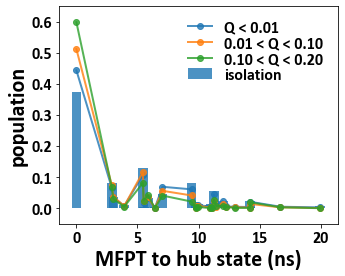

In [32]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=22)
leg_prop = font_manager.FontProperties(fname=font_path, size=16)
fig = plt.figure(figsize=(5,4))
data=np.loadtxt('hub_001-01-02.dat')
mfpt=data[:,0]
isop=data[:,2]
q0=data[:,3]
q1=data[:,4]
q2=data[:,5]
sub = fig.add_subplot(1,1,1)

plt.plot(mfpt, isop,'o-',lw=2,label='isolation',alpha=0.8)
plt.plot(mfpt, q0,'o-',lw=2,label='Q < 0.01',alpha=0.8)
plt.plot(mfpt, q1,'o-',lw=2,label='0.01 < Q < 0.10',alpha=0.8)
plt.plot(mfpt, q2,'o-',lw=2,label='0.10 < Q < 0.20',alpha=0.8)

for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.xlabel(r'MFPT to hub state (ns)',fontproperties=font_prop)
plt.ylabel(r'population',fontproperties=font_prop)
plt.ylim(-0.05,0.65)
leg=sub.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
#plt.semilogy()
plt.savefig('hub_001-01-02.png',dpi=600,bbox_inches='tight')
plt.show()

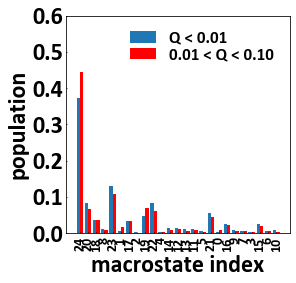

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
fig = plt.figure(figsize=(4,4))
data=np.loadtxt('hub_001-01-02.dat')
mfpt=data[:,0]
isop=data[:,2]
q0=data[:,3]
q1=data[:,4]
q2=data[:,5]
sub = fig.add_subplot(1,1,1)
x=np.arange(25)
#plt.bar(mfpt, isop,lw=2,label='isolation',alpha=0.8)
plt.bar(x-0.2, q0,lw=2,label='Q < 0.01',width = 0.4)
plt.bar(x+0.2, q1,lw=2,label='0.01 < Q < 0.10',color='red', width = 0.4)
#plt.plot(mfpt, q2,'o-',lw=2,label='0.10 < Q < 0.20',alpha=0.8)

for label in ( sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(24)
for label in (sub.get_xticklabels() ):
    label.set_fontproperties(font_prop)
    label.set_fontsize(14)
plt.xlabel(r'macrostate index',fontproperties=font_prop)
sub.tick_params(direction="in", length=1)
plt.xticks(x,(['24','20','18','8','23','1','17','2','19','22','4','14','12','13','11','5','21','0','16','9','7','3','15','6','10']),rotation=90)
plt.ylabel(r'population',fontproperties=font_prop)
plt.ylim(0,0.6)
#plt.xlim(0,25)
leg=sub.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
#plt.semilogy()
plt.savefig('hub_001-01-02.png',dpi=600,bbox_inches='tight')
plt.show()

In [71]:
newCount=[]
for i in np.arange(0,0.01,0.01):
    newCount.extend(QrangeCount[str(i)])


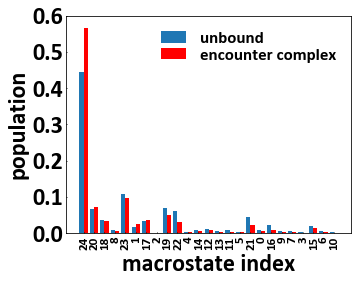

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
fig = plt.figure(figsize=(5.1,4))
data=np.loadtxt('hub_001-01-02.dat')
mfpt=data[:,1]

q0=data[:,4]
q9=data[:,7]
sub = fig.add_subplot(1,1,1)
x=np.arange(25)
#plt.bar(mfpt, isop,lw=2,label='isolation',alpha=0.8)
plt.bar(x-0.2, q0,lw=2,label='unbound',width = 0.4)
plt.bar(x+0.2, q9,lw=2,label='encounter complex',color='red', width = 0.4)
#plt.plot(mfpt, q2,'o-',lw=2,label='0.10 < Q < 0.20',alpha=0.8)

for label in ( sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(24)
for label in (sub.get_xticklabels() ):
    label.set_fontproperties(font_prop)
    label.set_fontsize(13)
plt.xlabel(r'macrostate index',fontproperties=font_prop)
sub.tick_params(direction="in", length=1)
plt.xticks(x,(['24','20','18','8','23','1','17','2','19','22','4','14','12','13','11','5','21','0','16','9','7','3','15','6','10']),rotation=90)
plt.ylabel(r'population',fontproperties=font_prop)
plt.ylim(0,0.6)
#plt.xlim(0,25)
leg=sub.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
#plt.semilogy()
plt.savefig('hub_001-090.png',dpi=600,bbox_inches='tight')
plt.show()

In [69]:
newCount=[]
for i in np.arange(0.01,1,0.01):
    newCount.extend(QrangeCount[str(i)])

In [70]:
len(newCount)

691396

In [67]:
newCount=[]
for i in np.arange(0.01,0.9,0.01):
    newCount.extend(QrangeCount[str(i)])

In [68]:
len(newCount)

617111

In [81]:
617111/(7457360+691396)*67.7*1000/12/63

6.781704263433377